### Which MOEA is the Best ?

Algorithms to be considered
* PAES(1+1)
* PAES(1+|A|)
* SPEA 2
* NSGA 2
* MOEA/D (Chebychev , Weighted sum , Penalty Boundary Intersection)
* NSGA 3

Literature Review:
* papers on all these algorithms (Foundational Papers)
* Test Problems Definitions 
* Evaluation Metrics (Strongly Pareto Compliant and Weakly Pareto Compliant)

In [1]:
!pip install pymoo

In [2]:
!pip install platypus-opt

     ---------------------------------------- 70.4/70.4 kB 3.8 MB/s eta 0:00:00


In [ ]:
# First Algorithm (1+1 PAES)

In [1]:
from platypus.algorithms import PAES
from platypus.problems import DTLZ2

In [2]:
problem = DTLZ2(nobjs=3)
algorithm = PAES(problem,divisions=8,capacity=1000)
algorithm.run(10000)

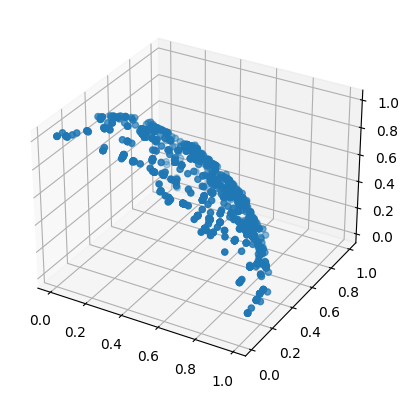

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([s.objectives[0] for s in algorithm.result],
           [s.objectives[1] for s in algorithm.result],
           [s.objectives[2] for s in algorithm.result])
plt.show()

In [4]:
# Second Algorithm is NSGA2


In [7]:
from pymoo.algorithms.moo.spea2 import SPEA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
problem = DTLZ2(n_obj=3)
algorithm = SPEA2(pop_size=1000)
res = minimize(problem,
               algorithm,
               ('n_gen', 1000),
               seed=1,
               verbose=False)

KeyboardInterrupt: 

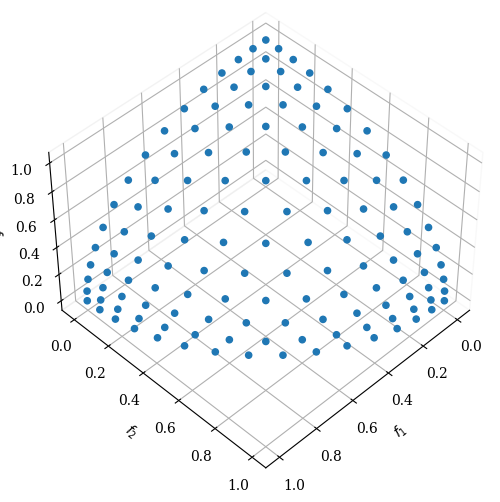

In [8]:
from pymoo.algorithms.moo.spea2 import SPEA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = DTLZ2(n_obj=3)
plot=Scatter()
plot.add(problem.pareto_front())
plot.show()


In [ ]:
# next algorithm is NSGA2

In [ ]:
from pymoo.algorithms.moo.spea2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
problem = DTLZ2(n_obj=3)
algorithm = NSGA2(pop_size=1000)
res = minimize(problem,
               algorithm,
               ('n_gen', 10000),
               seed=1,
               verbose=False)

In [ ]:
from pymoo.algorithms.moo.spea2 import MOEAD
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
problem = DTLZ2(n_obj=3)
ref_dirs = get_reference_directions('energy',3,90,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
res = minimize(problem,
               algorithm,
               ('n_gen', 10000),
               seed=1,
               verbose=False)